In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Read data from diabetes.csv file
dataset = pd.read_csv("diabetes.csv")
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [2]:
dataset.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Algunos resultados no incluyen el campo de insulina que es importante para la predicción. Se requiere hacer una transformación de los datos.

In [3]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
outcomes = dataset['Outcome'].value_counts()
print(outcomes)

Outcome
0    500
1    268
Name: count, dtype: int64


Se observa un sesgo en la cantidad de datos. Se tienen más resultados negativos que positivos.

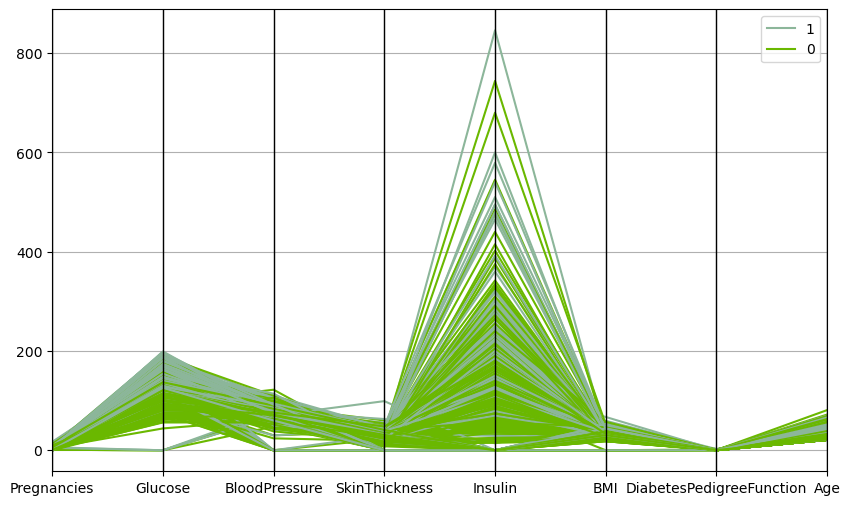

In [5]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(10,6))
parallel_coordinates(dataset, 'Outcome')
plt.show()

In [6]:
train, test = train_test_split(dataset, test_size=0.20)
train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,3.837134,121.657980,69.200326,20.547231,83.653094,31.998046,0.476091,33.241042,0.348534
std,3.315816,32.581687,19.056384,15.908288,120.331483,8.030880,0.344451,11.864675,0.476895
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.225000,0.237000,24.000000,0.000000
50%,3.000000,116.000000,72.000000,23.000000,36.500000,32.300000,0.375000,29.000000,0.000000
75%,6.000000,143.000000,80.000000,32.000000,130.000000,36.600000,0.630750,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
test.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,3.876623,117.850649,68.727273,20.493506,64.435065,31.970779,0.455071,33.240260,0.350649
std,3.587064,29.321250,20.566892,16.178436,90.934073,7.294531,0.273150,11.371938,0.478730
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.084000,21.000000,0.000000
25%,1.000000,98.000000,62.000000,0.000000,0.000000,27.425000,0.258000,24.000000,0.000000
50%,3.000000,119.000000,72.000000,23.000000,0.000000,31.600000,0.369000,30.000000,0.000000
75%,6.000000,136.000000,80.000000,32.000000,109.000000,36.175000,0.594000,40.000000,1.000000
max,13.000000,197.000000,106.000000,60.000000,600.000000,53.200000,1.441000,69.000000,1.000000


In [8]:
training_size = len(train)
testing_size = len(test)
total=training_size+testing_size
print(total)
print(training_size/total)
print(testing_size/total)

768
0.7994791666666666
0.20052083333333334


## KNN
Se utiliza la biblioteca sklearn para importar el modelo.
En este caso será supervisado y se le asigna el K.

In [9]:
d_dataset = pd.read_csv("diabetes.csv")

X = d_dataset[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]
y = d_dataset["Outcome"]


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, test_size=0.20)

#y = iris.target
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [10]:
X_train.head(10)
#X.iloc[[716]]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
22,7,196,90,0,0,39.8,0.451,41
497,2,81,72,15,76,30.1,0.547,25
395,2,127,58,24,275,27.7,1.600,25
381,0,105,68,22,0,20.0,0.236,22
258,1,193,50,16,375,25.9,0.655,24
529,0,111,65,0,0,24.6,0.660,31
65,5,99,74,27,0,29.0,0.203,32
7,10,115,0,0,0,35.3,0.134,29
15,7,100,0,0,0,30.0,0.484,32
716,3,173,78,39,185,33.8,0.970,31


In [11]:
y.iloc[[716]]

716    1
Name: Outcome, dtype: int64

In [12]:
X_train.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
22,7,196,90,0,0,39.8,0.451,41
497,2,81,72,15,76,30.1,0.547,25
395,2,127,58,24,275,27.7,1.600,25
381,0,105,68,22,0,20.0,0.236,22
258,1,193,50,16,375,25.9,0.655,24
529,0,111,65,0,0,24.6,0.660,31
65,5,99,74,27,0,29.0,0.203,32
7,10,115,0,0,0,35.3,0.134,29
15,7,100,0,0,0,30.0,0.484,32
716,3,173,78,39,185,33.8,0.970,31


In [13]:
y_train.head(10)

22     1
497    0
395    0
381    0
258    0
529    0
65     0
7      0
15     1
716    1
Name: Outcome, dtype: int64

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

""" clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))]
) """



' clf = Pipeline(\n    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=5))]\n) '

In [15]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)




In [16]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# TODO: precision
# TODO: recall

Accuracy: 0.7922077922077922


In [17]:
# training accuracy
ytrain_pred = knn.predict(X_train)
accuracy_trainning = accuracy_score(y_train, ytrain_pred)
print("Accuracy:", accuracy_trainning)

Accuracy: 0.7785016286644951


DOCUMENTAR EFECTOS DE TRANSFORMARCIÓN DE DATOS: ¿QUÉ PASA AL CAMBIAR LOS 0s?

In [18]:
df = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})

print(df)

     Predicted  Actual
680          0       0
607          0       0
639          0       0
638          0       1
295          0       0
..         ...     ...
526          0       0
685          0       0
391          1       1
654          0       0
315          0       0

[154 rows x 2 columns]
